In [2]:
import numpy as np
import csv
import igl
import math
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import geopandas as gpd
from shapely.ops import triangulate
import os

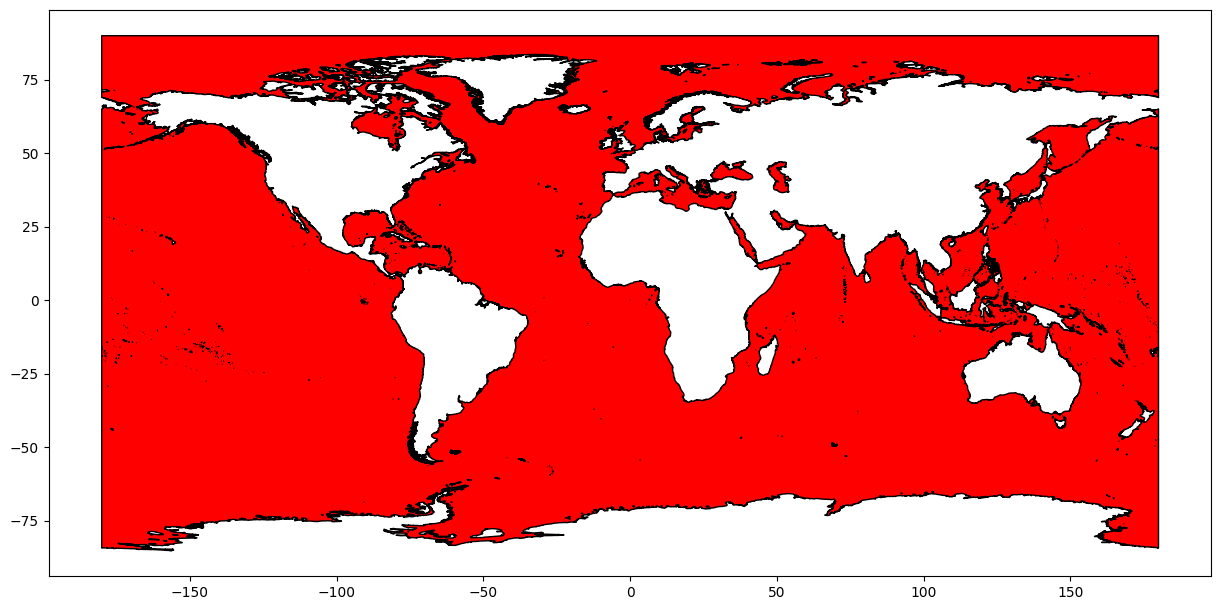

In [9]:
# Read the shapefile
current_dir = os.getcwd()
folder_path = os.path.join(current_dir, "ocean")
path = os.path.join(folder_path, "ne_10m_ocean.shp")
ocean = gpd.read_file(path)


ocean.plot(color='red', edgecolor='black', figsize=(15,15))
plt.savefig('ocean.png')

# gpf = gpd.GeoSeries(triangles)
# gpf.plot()

# triangles = []
# for geom in shp.geometry:
#     triangles.extend(triangulate(geom))


In [19]:
ocean.head()
# csv file location
current_dir = os.getcwd()
folder_path = os.path.join(current_dir, "Whale")

path = os.path.join(folder_path, "Blue and fin whales Southern California 2014-2015 - Argos data-reference-data.csv")
with open(path, 'r') as file:
    csvreader = csv.reader(file)
    data = []
    for row in csvreader:
        data.append(row)
    data = np.array(data)

# read all csv files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            csvreader = csv.reader(file)
            for row in csvreader:
                # Append the row to the data array, skipping the header row
                if csvreader.line_num > 1:
                    data = np.vstack((data, np.array(row)))

In [23]:
#Source: https://www.geeksforgeeks.org/how-to-read-all-csv-files-in-a-folder-in-pandas/
# use glob to get all the csv files 
# in the folder
# current_dir  = os.getcwd()
# csv_files = glob.glob(os.path.join(current_dir, "Whale", "*.csv"))
  
# # loop over the list of csv files
# for f in csv_files:
      
#     # read the csv file
#     df = pd.read_csv(f)
    
#     df = np.array(df)

NameError: name 'glob' is not defined

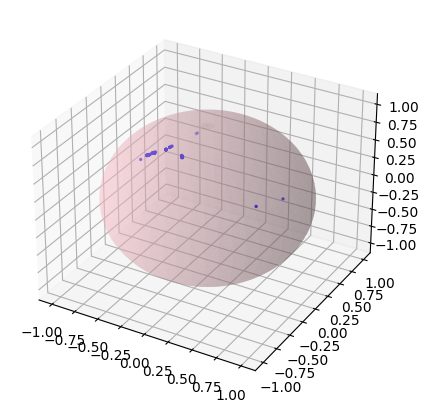

In [20]:
# get the longitude and latitude
long = data[1:,41]
lat = data[1:,40]

# convert to polar coordinates
long = np.array(long, dtype=float)
lat = np.array(lat, dtype=float)

def longConvert(long):
    for i in range(len(long)):
        if long[i] < 0:
            long[i] = 360 + long[i]
    return long

lat = 90 - lat # north pole is 90, south pole is -90, convert to 0 to 180
long = longConvert(long) # convert to 0 to 360

# convert to radians
long = np.deg2rad(long)
lat = np.deg2rad(lat)

# convert to cartesian coordinates
x = np.cos(lat) * np.cos(long)
y = np.cos(lat) * np.sin(long)
z = np.sin(lat)

# Create a sphere
r = 1
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
xs = r*np.cos(u)*np.sin(v)
ys = r*np.sin(u)*np.sin(v)
zs = r*np.cos(v)

# plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xs, ys, zs, color='pink', alpha=0.3, label='Sphere')
# ax.set_xlim3d(-1, 1)
# ax.set_ylim3d(-1, 1)
# ax.set_zlim3d(-1, 1)
ax.scatter(x, y, z, s=2, color='b', label='Data')
plt.show()